<a href="https://colab.research.google.com/github/adeke910/Loan_approval_prediction/blob/main/Loan_Approval_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://raw.githubusercontent.com/adeke910/Loan_approval_prediction/main/Loan_Train.csv
loan_data = pd.read_csv('Loan_Train.csv')
loan_data.head(5)

--2023-01-13 11:07:31--  https://raw.githubusercontent.com/adeke910/Loan_approval_prediction/main/Loan_Train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [text/plain]
Saving to: ‘Loan_Train.csv.8’

Loan_Train.csv.8    100%[===================>]  37.12K  --.-KB/s    in 0.002s  

2023-01-13 11:07:31 (23.4 MB/s) - ‘Loan_Train.csv.8’ saved [38011/38011]



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID- Unique Loan ID           

Gender- Male/ Female

Married- Applicant married (Y/N)

Dependents- Number of dependents

Education- Applicant Education (Graduate/ Under Graduate)

Self_Employed- Self employed (Y/N)

ApplicantIncome- Applicant income

CoapplicantIncome- Coapplicant income

LoanAmount- Loan amount in thousands

Loan_Amount_Term- Term of loan in months

Credit_History- credit history meets guidelines

Property_Area- Urban/ Semi Urban/ Rural

Loan_Status- (Target) Loan approved (Y/N)

In [ ]:
#To identify the number of rows and columns
loan_data.shape

(614, 13)

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# To identify the number of unique values in each of the columns in the dataset
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

The highest number of dependants for each individual in the data is 4.

In [ ]:
# To represent the missing values in percentage to have a clearer picture of the missing data
for column in loan_data.columns:
    percent = loan_data[column].isnull().mean()
    print(f'{column}: {round(percent*100, 2)}%')

Loan_ID: 0.0%
Gender: 2.12%
Married: 0.49%
Dependents: 2.44%
Education: 0.0%
Self_Employed: 5.21%
ApplicantIncome: 0.0%
CoapplicantIncome: 0.0%
LoanAmount: 3.58%
Loan_Amount_Term: 2.28%
Credit_History: 8.14%
Property_Area: 0.0%
Loan_Status: 0.0%


##### Dealing with missing values

In [ ]:
# Using mode to compute missing values for Gender, Married, Dependents, Self_Employed columns

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)

loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)

loan_data["Dependents"].replace(np.nan,'0',inplace=True)

loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

loan_data["Loan_Amount_Term"].replace(np.nan,360.0,inplace=True)



loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)

loan_data["Credit_History"].replace(np.nan,1.0,inplace=True)

loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Target variable = Loan Status.

##### Visualizing Categorical features with respect to the target variable

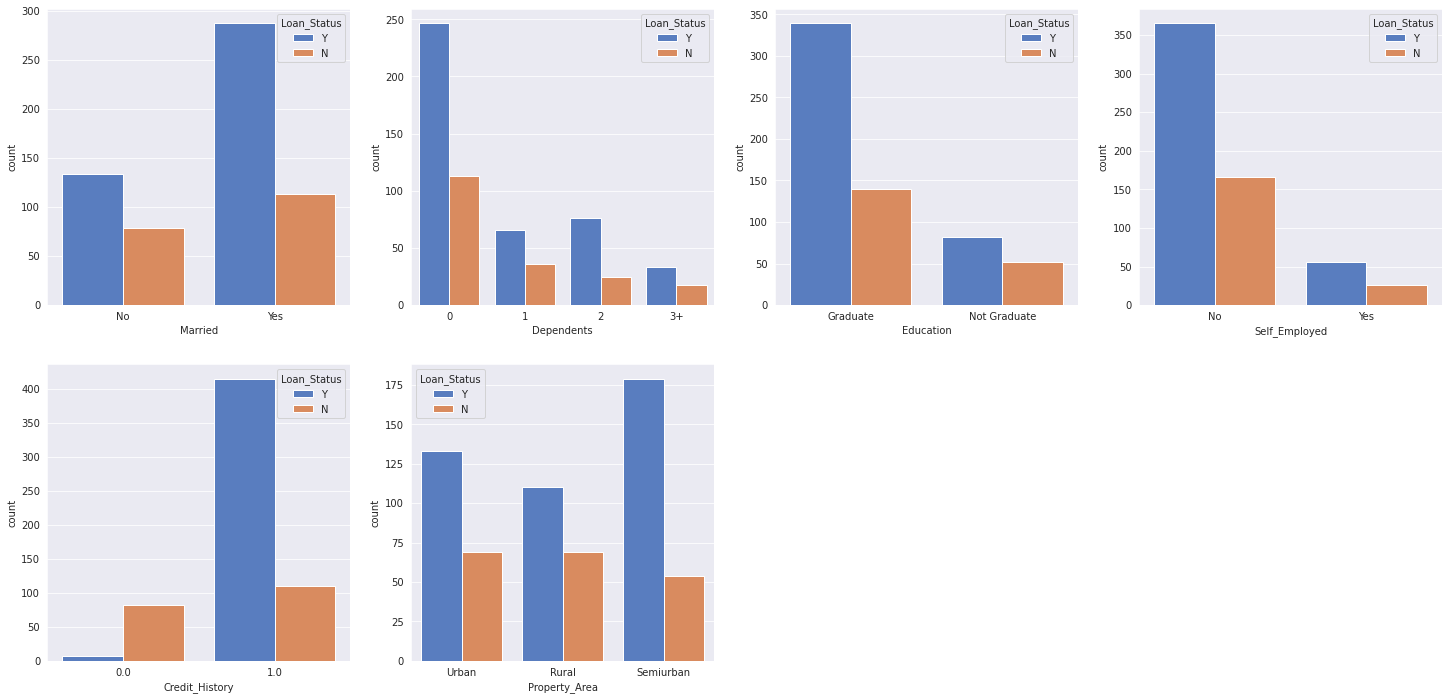

In [ ]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Status']

cat = categorical_features[1:-1]

fig = plt.figure(figsize=(25,12))
fig.tight_layout()

for i in range(len(cat)):
  col = cat[i]
  sub = fig.add_subplot(2, 4, i + 1)
  sns.countplot(data=loan_data, x=col, hue='Loan_Status', palette='muted')
plt.show()
  


- The male gender were more likely to have their loan request approved.
- Married individuals were more likely to have their loan request approved.
- People who have their no dependents were more likely to have their loan equest approved.
- Graduates were more likely to have their loan request approved.
- The self employed were more likely to have their loan request denied.
- Most people had a credit history of 1.0
- Most of the loan applicants had properties in Semi Urban areas.


###33 Visualizing numeric data 

In [ ]:
# Create a new column Total Income
loan_data["TotalIncome"] = (loan_data["ApplicantIncome"] + loan_data["CoapplicantIncome"])

# Dropping the Apllicant and co applicants columns
loan_data.drop(["ApplicantIncome"],axis=1,inplace=True)

loan_data.drop(["CoapplicantIncome"],axis=1,inplace=True)

loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


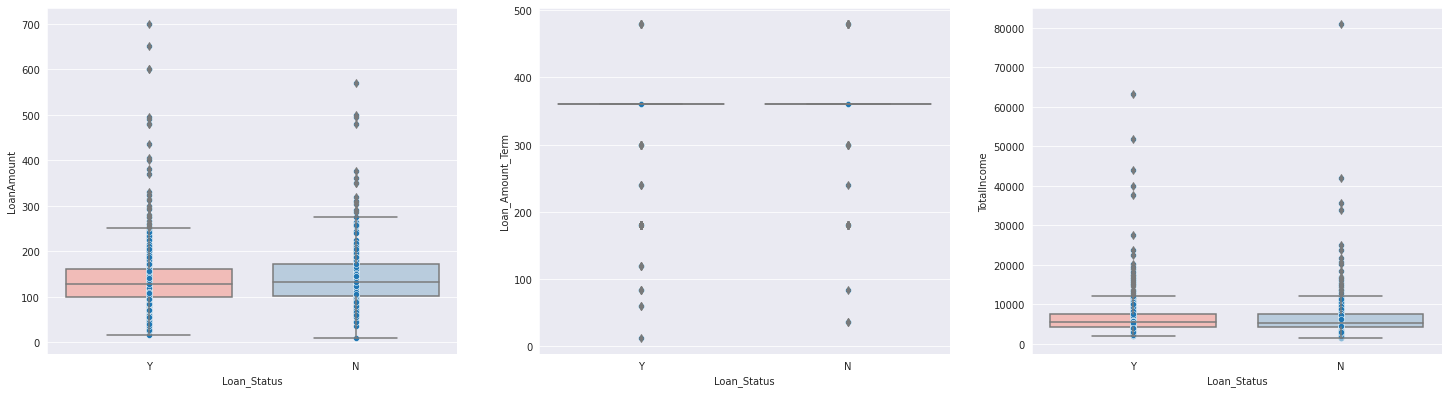

In [ ]:
numeric_features = ['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

fig = plt.figure(figsize = (25,14))
fig.tight_layout()

for i in range(len(numeric_features)):
  column = numeric_features[i]
  sub = fig.add_subplot(2, 3, i + 1)
  sns.boxplot(x = 'Loan_Status', y = column, data = loan_data, palette = 'Pastel1')
  sns.scatterplot(x = 'Loan_Status', y = column, data = loan_data, palette = 'Pastel1')
plt.show()

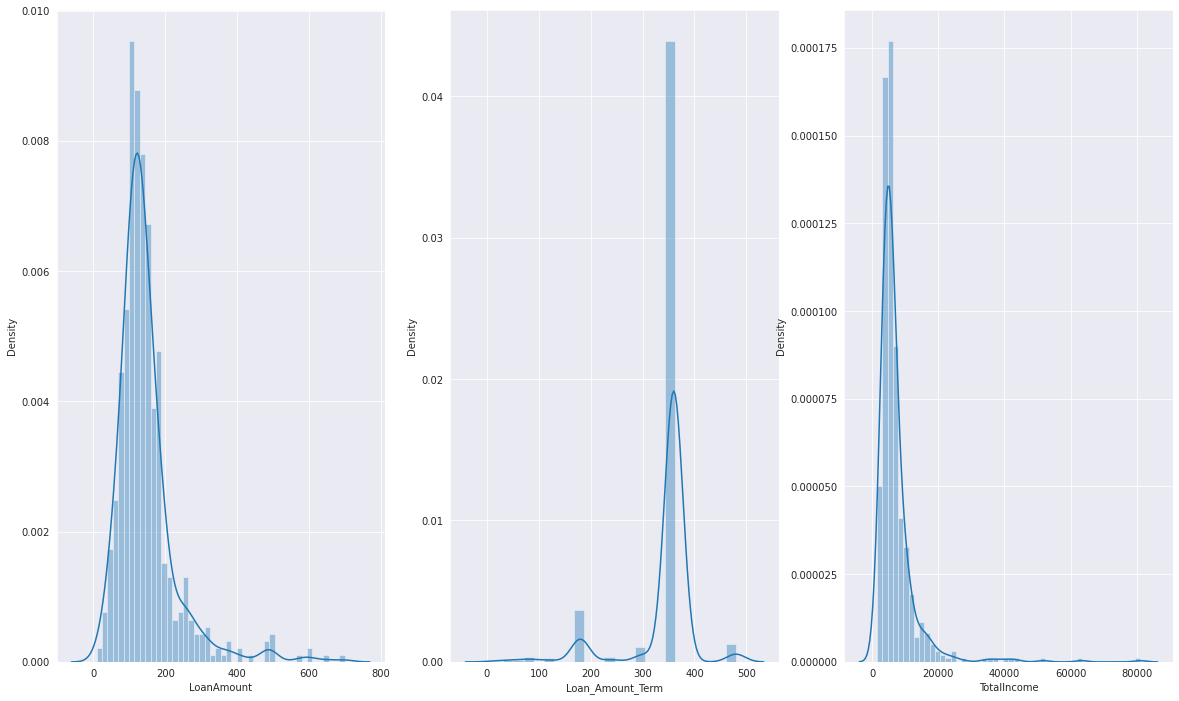

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(1,3,1)
sns.distplot(loan_data["LoanAmount"])

plt.subplot(1,3,2)
sns.distplot(loan_data["Loan_Amount_Term"])

plt.subplot(1,3,3)
sns.distplot(loan_data["TotalIncome"])

fig.tight_layout()
plt.show()

- Most of the applicants had total incomes less than 100,000.
- Most of the applicants requested for loan amounts between 100 and 200 thousand.
- Outliers have been detected in the loan amounts and total income columns.

##### Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_features:
  loan_data[col]= le.fit_transform(loan_data[col])
loan_data.head()


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360.0,1,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1,2,1,6000.0


In [ ]:
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].astype("int64")
loan_data["TotalIncome"] = loan_data["TotalIncome"].astype("int64")
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360,1,2,1,5849
1,1,1,1,0,0,128.000000,360,1,0,0,6091
2,1,1,0,0,1,66.000000,360,1,2,1,3000
3,1,1,0,1,0,120.000000,360,1,2,1,4941
4,1,0,0,0,0,141.000000,360,1,2,1,6000


Text(0.5, 1.0, 'Correlation Matrix Heat Map')

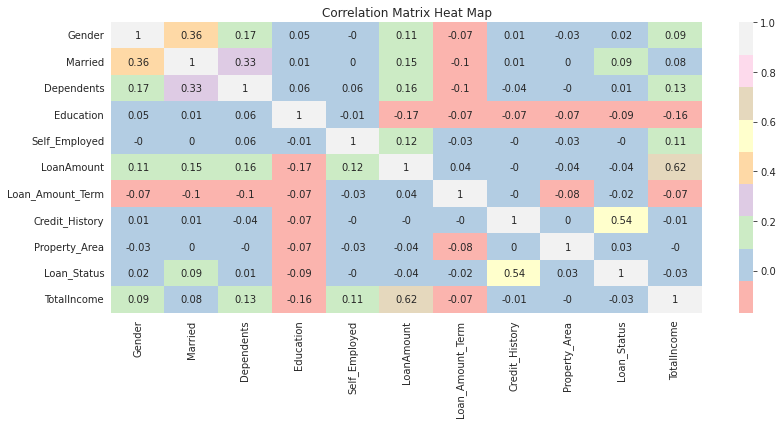

In [ ]:
#Plotting the Correlation Matrix Heat Map

plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.heatmap(loan_data.corr().round(2), annot=True, cmap='Pastel1') 
ax.set_title('Correlation Matrix Heat Map')

- Credit History is highly correlated to the target variable.
- Education, Self_Employed, Total Income, Loan AmounT have negative correlation.
- Loan amount and applicants Total Income are highly correlated.
- Gender-Married & Dependents-Married are correlated.

In [ ]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360,1,2,1,5849
1,1,1,1,0,0,128.000000,360,1,0,0,6091
2,1,1,0,0,1,66.000000,360,1,2,1,3000
3,1,1,0,1,0,120.000000,360,1,2,1,4941
4,1,0,0,0,0,141.000000,360,1,2,1,6000
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.000000,360,1,0,1,2900
610,1,1,3,0,0,40.000000,180,1,0,1,4106
611,1,1,1,0,0,253.000000,360,1,2,1,8312
612,1,1,2,0,0,187.000000,360,1,2,1,7583


In [ ]:
numeric_features = ['LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

for column in numeric_features:
  loan_data[[column]] = ss.fit_transform(loan_data[[column]])
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,0.000000,0.273231,1,2,1,-0.182184
1,1,1,1,0,0,-0.219273,0.273231,1,0,0,-0.144684
2,1,1,0,0,1,-0.957641,0.273231,1,2,1,-0.623656
3,1,1,0,1,0,-0.314547,0.273231,1,2,1,-0.322884
4,1,0,0,0,0,-0.064454,0.273231,1,2,1,-0.158785


##### Splitting the dataset

In [ ]:
x = loan_data.iloc[:,:-2] #Features
y = loan_data.iloc[:,-2]  #Target variable

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3,stratify=y)

print ('Training Set: %d, rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 429, rows
Test Set: 185 rows


In [ ]:
y_train.value_counts().to_frame().T


,1,0
Loan_Status,295,134


In [ ]:
y_test.value_counts().to_frame().T

,1,0
Loan_Status,127,58


##### Balancing Train Data

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 1)
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

x_test1, y_test1 = smote.fit_resample(x_test, y_test)


y_train1.value_counts().to_frame().T


,1,0
Loan_Status,295,295


In [ ]:
y_test1.value_counts().to_frame().T


,1,0
Loan_Status,127,127


##### Model Function

In [ ]:
from sklearn.metrics import accuracy_score


def my_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    train_accuracy=model.score(x_train,y_train)
    test_accuracy=model.score(x_test,y_test)
    print(str(model)[:-2],accuracy_score(y_test,y_pred))

    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model

In [ ]:
from sklearn.metrics import accuracy_score


def my_model1(model1):
    model1.fit(x_train1,y_train1)
    y_pred=model1.predict(x_test1)
    train_accuracy=model1.score(x_train1,y_train1)
    test_accuracy=model1.score(x_test1,y_test1)
    print(str(model1)[:-2],accuracy_score(y_test1,y_pred))

    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model1

##### Testing the accuracy of the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



K_MODEL = my_model(KNeighborsClassifier())
LOG_MODEL = my_model(LogisticRegression())
NB_MODEL = my_model(GaussianNB())
DT_MODEL = my_model(DecisionTreeClassifier())
SVC_MODEL = my_model(SVC())
RFC_MODEL = my_model(RandomForestClassifier())


KNeighborsClassifier 0.7297297297297297
Training Accuracy: 0.7948717948717948
Testing Accuracy :0.7297297297297297


LogisticRegression 0.8216216216216217
Training Accuracy: 0.8018648018648019
Testing Accuracy :0.8216216216216217


GaussianNB 0.7891891891891892
Training Accuracy: 0.8018648018648019
Testing Accuracy :0.7891891891891892


DecisionTreeClassifier 0.7567567567567568
Training Accuracy: 0.9906759906759907
Testing Accuracy :0.7567567567567568


SVC 0.8162162162162162
Training Accuracy: 0.8065268065268065
Testing Accuracy :0.8162162162162162


RandomForestClassifier 0.8108108108108109
Training Accuracy: 0.9906759906759907
Testing Accuracy :0.8108108108108109




In [ ]:
K_MODEL1 = my_model1(KNeighborsClassifier())
LOG_MODEL1 = my_model1(LogisticRegression())
NB_MODEL = my_model1(GaussianNB())
DT_MODEL = my_model1(DecisionTreeClassifier())
SVC_MODEL = my_model1(SVC())
RFC_MODEL = my_model1(RandomForestClassifier())

KNeighborsClassifier 0.7086614173228346
Training Accuracy: 0.8254237288135593
Testing Accuracy :0.7086614173228346


LogisticRegression 0.7598425196850394
Training Accuracy: 0.7288135593220338
Testing Accuracy :0.7598425196850394


GaussianNB 0.7519685039370079
Training Accuracy: 0.7338983050847457
Testing Accuracy :0.7519685039370079


DecisionTreeClassifier 0.7125984251968503
Training Accuracy: 0.9932203389830508
Testing Accuracy :0.7125984251968503


SVC 0.7874015748031497
Training Accuracy: 0.7508474576271187
Testing Accuracy :0.7874015748031497


RandomForestClassifier 0.7677165354330708
Training Accuracy: 0.9932203389830508
Testing Accuracy :0.7677165354330708




In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
print(clf)

XGBClassifier(n_estimators=500)


In [ ]:
from sklearn import metrics

XGB_MODEL=clf.fit(x_train1,y_train1)
prediction=XGB_MODEL.predict(x_test1)

print(metrics.accuracy_score(y_test1, prediction))

0.7401574803149606


In [ ]:
from sklearn import metrics

XGB_MODEL1=clf.fit(x_train,y_train)
prediction=XGB_MODEL1.predict(x_test)

print(metrics.accuracy_score(y_test, prediction))


0.7891891891891892


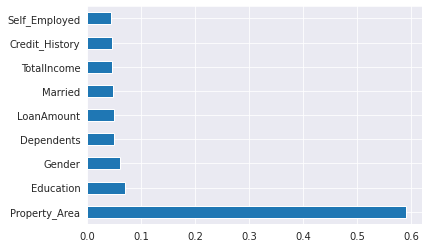

In [ ]:
Predictors = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Credit_History', 'Property_Area', 'TotalIncome']

feature_imp = pd.Series(XGB_MODEL.feature_importances_, index = Predictors)
feature_imp.nlargest(9).plot(kind = 'barh')

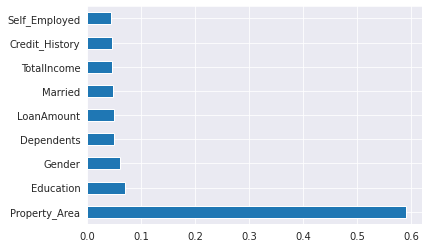

In [ ]:
feature_imp = pd.Series(XGB_MODEL1.feature_importances_, index = Predictors)
feature_imp.nlargest(9).plot(kind = 'barh')

In [ ]:
import joblib

# Save the model as a pickle file
filename = './loan-model_xgb.pkl'
joblib.dump(XGB_MODEL1, filename)

['./loan-model_xgb.pkl']

In [ ]:
import joblib

# Save the model as a pickle file
filename = './loan-model_log.pkl'
joblib.dump(LOG_MODEL, filename)

['./loan-model_log.pkl']